In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
%matplotlib inline

In [2]:
#loading the dataset:
titanic = pd.read_csv('full.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0


In [3]:
titanic.info()
#this will give us info on how many non-null values are present in the system and also their datatype:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

<AxesSubplot:>

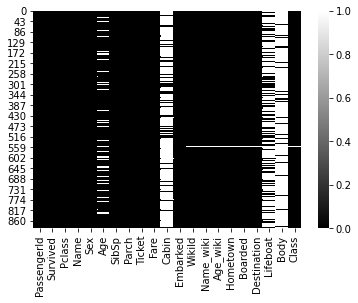

In [4]:
# We can also visualize this using a heatmap:
sns.heatmap(titanic.isnull(), cmap='gray')
#there are missing values in the age column and many others so they can be removed from the computation later.

In [5]:
titanic['Survived'].unique() #0 corresponds to did not survive 

array([0, 1], dtype=int64)

In [6]:
#lets get the count of the values:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#So there were 549 people who didn't survive the disaster.

<AxesSubplot:xlabel='Survived', ylabel='count'>

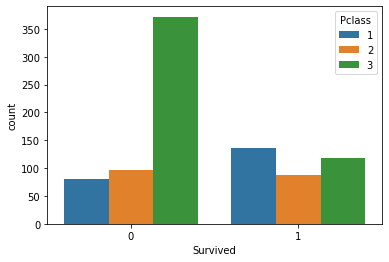

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

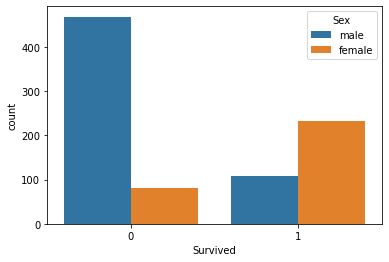

In [8]:
sns.countplot(x='Survived',hue='Sex',data=titanic)
# we can see here that majority of the people who died were men
# also majority of the people who survived are women (Interesting)

### Lets do some data cleaning now as there were some missing values earlier and there are some columns that would make little sense being used in the computation.

In [9]:
#next we will drop some values:
#Cabin column: too many missing values
#WikiId: Little meaning for using in calculation
#Ticket Id: Same as above
#Name_wiki : Same as name column
#age wiki_ same as age column
#hometown : high cardinality:
#boarded:little meaning in using that column
#lifeboat: too many missing values
#body : same as above
#Class: same as pclass
titanic.drop(['Cabin','WikiId','Name_wiki','Age_wiki','Hometown','Lifeboat','Body','Ticket','Name','Destination','Class','Boarded'],axis=1, inplace=True)

In [10]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [12]:
#we can impute the age column with mean of the column as it would have minimal effect on the calculation:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [13]:
titanic['Age'].isnull().sum()

0

<AxesSubplot:>

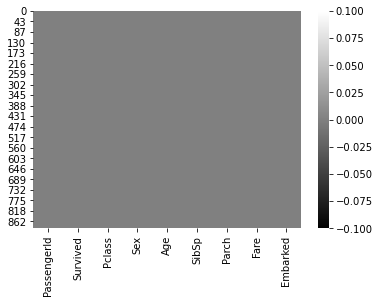

In [14]:
#and we can just drop the rows with any missing fields now as most of them are populated and dont ahve any missing values:
titanic.dropna(inplace=True)
#now lets check if there are any missing values
sns.heatmap(titanic.isnull(),cmap='gray')
#so now we can say that there are no missing values in the dataset and we can perform the analysis.

### categorical values containing strings  need to be converted into integers using the get_dummies()

In [15]:
data_dummies = [pd.get_dummies(titanic['Sex'] , prefix='Sex', prefix_sep=':'),
                pd.get_dummies(titanic['Embarked'] , prefix='Embarked', prefix_sep=':'),
                pd.get_dummies(titanic['Pclass'] , prefix='Pclass ', prefix_sep=':')]

In [16]:
data_dummies

[     Sex:female  Sex:male
 0             0         1
 1             1         0
 2             1         0
 3             1         0
 4             0         1
 ..          ...       ...
 886           0         1
 887           1         0
 888           1         0
 889           0         1
 890           0         1
 
 [889 rows x 2 columns],
      Embarked:C  Embarked:Q  Embarked:S
 0             0           0           1
 1             1           0           0
 2             0           0           1
 3             0           0           1
 4             0           0           1
 ..          ...         ...         ...
 886           0           0           1
 887           0           0           1
 888           0           0           1
 889           1           0           0
 890           0           1           0
 
 [889 rows x 3 columns],
      Pclass :1  Pclass :2  Pclass :3
 0            0          0          1
 1            1          0          0
 2            0 

In [17]:
#the next task is to concatenate these dummies into a dataframe:
data_dummies=pd.concat(data_dummies,axis=1)


In [18]:
data_dummies

,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,Pclass :1,Pclass :2,Pclass :3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0
887,1,0,0,0,1,1,0,0
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [19]:
#now we can concatenate this dataset that we have created to our original dataset:
titanic=pd.concat([titanic,data_dummies],axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,Pclass :1,Pclass :2,Pclass :3
0,1,0,3,male,22.000000,1,0,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,female,38.000000,1,0,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,female,26.000000,0,0,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,female,35.000000,1,0,53.1000,S,1,0,0,0,1,1,0,0
4,5,0,3,male,35.000000,0,0,8.0500,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,0,1,0,0,1,0,1,0
887,888,1,1,female,19.000000,0,0,30.0000,S,1,0,0,0,1,1,0,0
888,889,0,3,female,29.699118,1,2,23.4500,S,1,0,0,0,1,0,0,1
889,890,1,1,male,26.000000,0,0,30.0000,C,0,1,1,0,0,1,0,0


In [20]:
#now since we have the columns in the encoded form that we need, we can drop the original columns:
titanic.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [21]:
titanic.tail(5)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,Pclass :1,Pclass :2,Pclass :3
886,887,0,27.000000,0,0,13.00,0,1,0,0,1,0,1,0
887,888,1,19.000000,0,0,30.00,1,0,0,0,1,1,0,0
888,889,0,29.699118,1,2,23.45,1,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,30.00,0,1,1,0,0,1,0,0
890,891,0,32.000000,0,0,7.75,0,1,0,1,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data_inputs_train, data_inputs_test, data_targets_train, data_targets_test = train_test_split(titanic.drop('Survived', axis = 1), titanic['Survived'], test_size = 0.3, random_state = 42)
#explaining the arguments of the train_test_split() method:
#the first argument is all the columns except the Survived Column
#the 2nd argument is the dependent variable 
#the 3rd is the size of the test set (0.3 means 30% in test set)
#random_state = 42 means that we get the same split everytime.

In [24]:
data_inputs_train.shape

(622, 13)

In [25]:
data_targets_train.shape

(622,)

In [26]:
data_inputs_test.shape

(267, 13)

In [27]:
data_targets_test.shape

(267,)

In [28]:
data_inputs_train, data_inputs_test, data_targets_train, data_targets_test = train_test_split(titanic.drop('Survived', axis = 1), titanic['Survived'], test_size = 0.3, random_state = 42)
#fixing the random_state will generate the same split everytime.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#allocate the method to an object:
log=LogisticRegression()

In [31]:
log.fit(data_inputs_train,data_targets_train)
#the warning generated is because we have not scaled our data and the range is high.
#scaling can be done in many ways but the most common method is the: StandardScalar() which gives a mean of 0 and the 
#standard deviation of 1.

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
#lets predict the values based on our model
Predicted=log.predict(data_inputs_test)

In [33]:
#lets check the accuracy of our model:
from sklearn.metrics import accuracy_score

In [34]:
#lets see how our model fared by checking it against the real values:
accuracy_score(data_targets_test,Predicted)*100 
#the accurracy_score is almost 80% which is pretty impressive:

80.14981273408239